# Perceptron and Adaline Algorithms -- Homework 2

### Basic Information:

In [1]:
# Mary B. Makarious
# Homework 2 -- Perceptron and Adaline Algorithms

In [2]:
# Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to visualize the data
from matplotlib.colors import ListedColormap
from numpy.random import seed

# Keep everything in Jupyter
%matplotlib inline 

## Problem 1 -- Linearly Separable

- Create your own dataset (at least 10 examples) that is linearly separable. 
- Train a Perceptron model. 
- Provide evidence that Perceptron found a decision boundary.

#### Grizzly Bears vs. Giant Pandas (GB vs. GP)
##### This dataset includes the weights and fur color.

In [3]:
df = pd.read_csv('PandaPandaPanda.csv', header = None)

y = df.ix[0:16,0].values 
y = np.where(y == 'Grizzly Bear', -1,1)

X = df.iloc[0:16, [1,2]].values

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Plotting the Data
##### Epochs vs. Number of Updates 

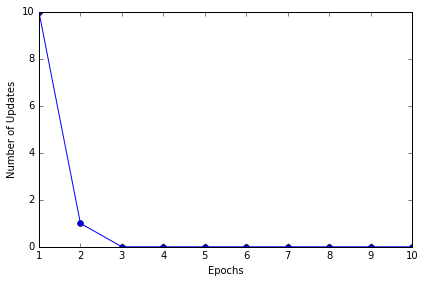

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')

plt.tight_layout()
plt.show()

##### Mapping the Data 

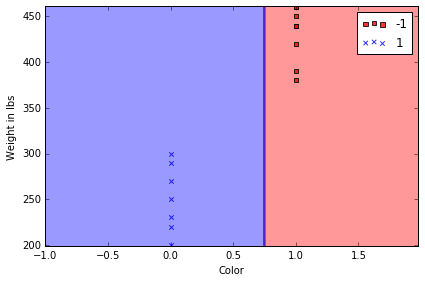

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Color')
plt.ylabel('Weight in lbs')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Problem 2 -- Not Linearly Separable

- Create your own small dataset (at least 10 examples) that is not linearly seperable. 
- Now train a Perceptron model. 
- Did the algorithm converge? Provide evidence.

#### Python vs. Anaconda
##### This dataset includes the weights and lengths.

In [6]:
df = pd.read_csv('SlitheringSnake.csv', header = None)

y = df.ix[0:16,0].values 
y = np.where(y == 'Python', -1,1)

X = df.iloc[0:16, [1,2]].values

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Plotting the Data
##### Epochs vs. Number of Updates 

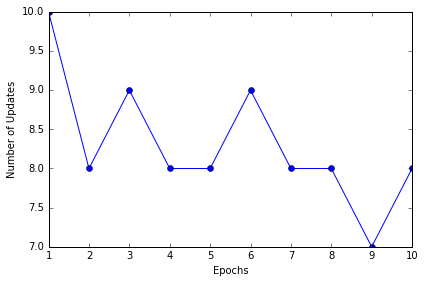

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Updates')

plt.tight_layout()
plt.show()

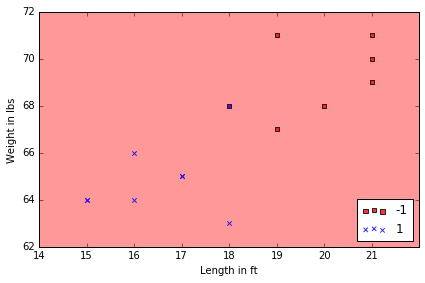

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Length in ft')
plt.ylabel('Weight in lbs')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

## Problem 3 -- Titanic Adaline

- Download the Titanic dataset and randomly split it into training (70%) and test (30%) sets.
- Train an Adaline model using the training data. Now evaluate it on your test data. 
- Please report your performance. You are free to use either the SGD or the batch version of Adaline.

In [9]:
df = pd.read_csv('train.csv', header = None)

# Deleted the Header
y = df.iloc[0:860,1].values 
y = np.where(y == 0, -1,1)

X = df.iloc[0:860, [2,4]].values

### AdalineSGD from the Textbook

In [10]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

### Train the Model
##### Most predictive features: Sex and Class.

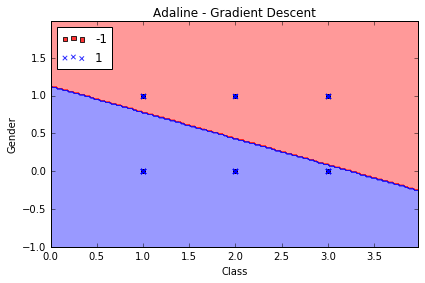

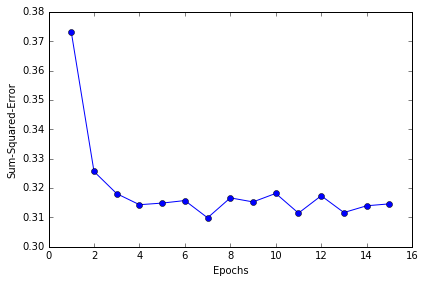

In [12]:
ada = AdalineSGD(n_iter=15, eta=0.01)
ada.fit(X, y)


plot_decision_regions(X, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Class')
plt.ylabel('Gender')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared-Error')

plt.tight_layout()
plt.show()

In [15]:
test = pd.read_csv('test.csv', header = None)

y = test.iloc[0:277,1].values 
y = np.where(y == 0, -1,1)

X = test.iloc[0:277, [2,4]].values

predict = ada.predict(X)
notCorrect = 0
correct = 0
for i in predict:
    if predict[i] == y [i]:
        correct +=1
    else:
        notCorrect +=1

# See the values of -1 and 1
# print(predict)

print ('Accuracy: ')
print (correct/277 * 100,'%')
        

Accuracy: 
31.046931407942242 %


## Problem 4 -- Titanic Adaline

- What were the most predictive features of your Titanic model? Provide evidence.

This will be sex and class.

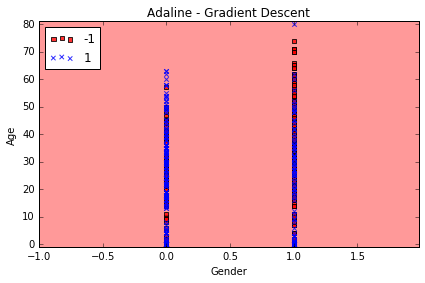

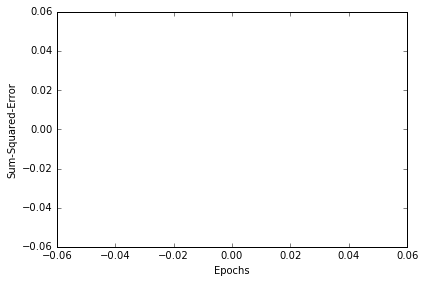

In [16]:
y = df.iloc[0:860,1].values 
y = np.where(y == 0, -1,1)

X = df.iloc[0:860, [4,5]].values

ada = AdalineSGD(n_iter=15, eta=0.01)
ada.fit(X, y)


plot_decision_regions(X, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared-Error')

plt.tight_layout()

plt.show()